# Au!

## Inicialización

In [1]:
#importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
import seaborn as sns
from scipy import stats as st

## Cargar datos

In [2]:
#cargar el archivo del conjunto d entrenamiento
try:
    data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
except:
    data_train = pd.read_csv(r'\datasets\gold_recovery_train.csv')

In [3]:
data_train.info()
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
#cargar el archivo del conjunto de prueba
try:
    data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
except:
    data_test = pd.read_csv(r'\datasets\gold_recovery_test.csv')

In [5]:
data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
#cargar el archivo full
try:
    data_full = pd.read_csv('/datasets/gold_recovery_full.csv')
except:
    data_full = pd.read_csv(r'\datasets\gold_recovery_full.csv')

In [7]:
data_full.info()
data_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
data_full.duplicated().sum()

0

No hay datos duplicados en el data_full.

## Cálculo de recuperación

In [9]:
data_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

In [10]:
# funcion para la formula de la recuperacion
def recuperacion(row):
    c = 'rougher.output.concentrate_au'
    f = 'rougher.input.feed_au'
    t = 'rougher.output.tail_au'
    
    try:
        recup = (row[c]*(row[f]-row[t]))/(row[f]*(row[c]-row[t])) * 100
    except:
        recup = 0 #division entre cero
        
    return recup

In [11]:
#se agrega una nueva columna al data_train con los valores obtenidos por la formula de recuperacion
data_train['recup'] = data_train.apply(lambda x: recuperacion(x), axis = 1)

In [12]:
#EAM entre los resultados de la formula anterior y de los datos del data_train
eam = (data_train['recup']-data_train['rougher.output.recovery']).abs().mean()
print('EAM =', eam)

EAM = 9.303415616264301e-15


La diferencia de resultados del valor obtenido por la formula de recuperacion y el extraido de la tabla tiende a cero; por lo cual se puede trabaajr con cualquiera de ellos.

In [13]:
# Se encontrara las caracteristicas no disponibles en el conjunto de prueba
no_caract = []
for carac in data_train:
    if carac not in data_test:
        no_caract.append(carac)

print(len(no_caract))
no_caract

35


['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Se obtiene 35 caracteristicas que no se encuentran en data_test.

## Preprocesamiento de datos

### Rellenar valores ausentes

In [14]:
#Al estar los valores ordenados por fecha, se relleanara los valores ausentes por los cercanos 
data_train = data_train.fillna(method = 'ffill')
data_test = data_test.fillna(method = 'ffill')

In [15]:
#Se agrega las columnas para target desde los dataos de data_full
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on = 'date', how = 'left')
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


In [16]:
# Para que coincidan en columnas y filas, realizamos en data_train
data_train = data_train[data_test.columns]
data_train.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,68.347543
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,66.927016


Se procedio a llena los valores ausentes con los datos aledaños.

## Análisis de datos

### Concentración de metales

In [17]:
data_full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

#### Oro

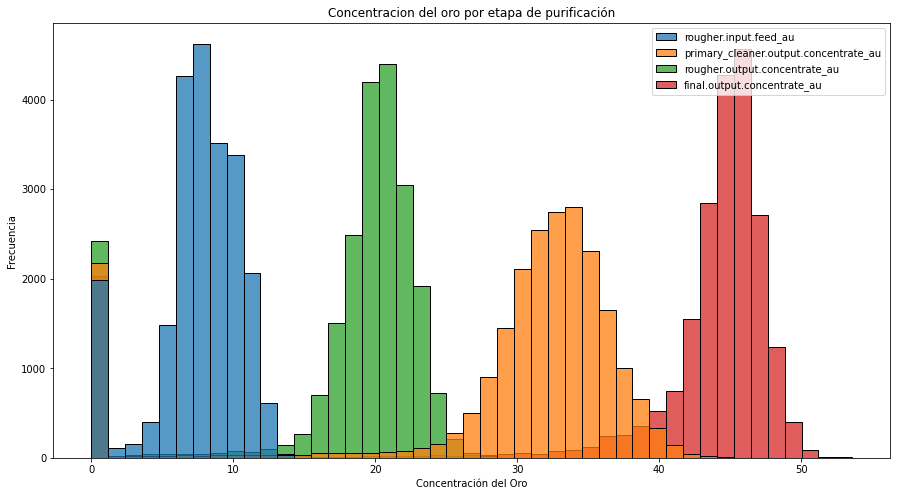

In [18]:
# Histrograma de concentracion de oro por etapa 
au_concentrate = data_full[['rougher.input.feed_au', 'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_au', 
                  'final.output.concentrate_au']]

plt.figure(figsize = [15,8])
sns.histplot(au_concentrate)
plt.xlabel('Concentración del Oro')
plt.ylabel('Frecuencia')
plt.title('Concentracion del oro por etapa de purificación')
plt.show()


La concentración de oro va subiendo de acuerdo al avance por etapa.

#### Plata

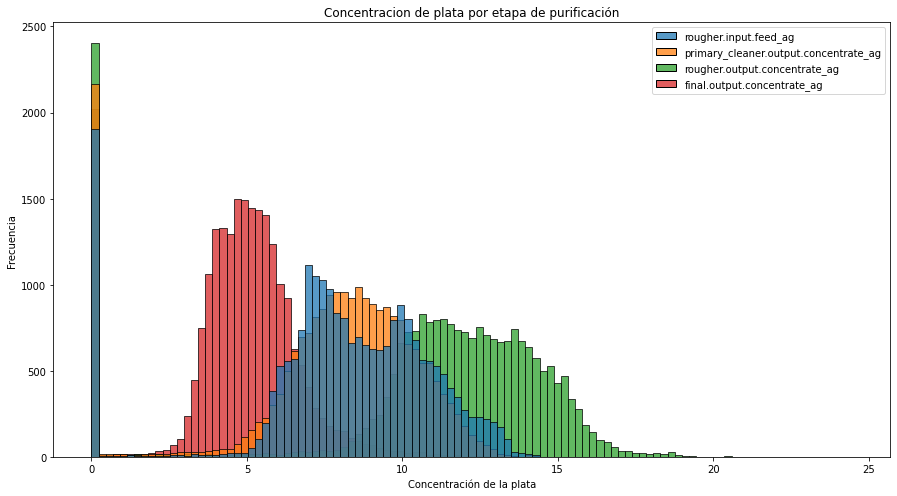

In [19]:
# Histrograma de concentracion de plata por etapa 
au_concentrate = data_full[['rougher.input.feed_ag', 'primary_cleaner.output.concentrate_ag', 'rougher.output.concentrate_ag', 
                  'final.output.concentrate_ag']]

plt.figure(figsize = [15,8])
sns.histplot(au_concentrate)
plt.xlabel('Concentración de la plata')
plt.ylabel('Frecuencia')
plt.title('Concentracion de plata por etapa de purificación')
plt.show()


La concentracion de plata avanza de acuerdo continua la etapa.

#### Plomo

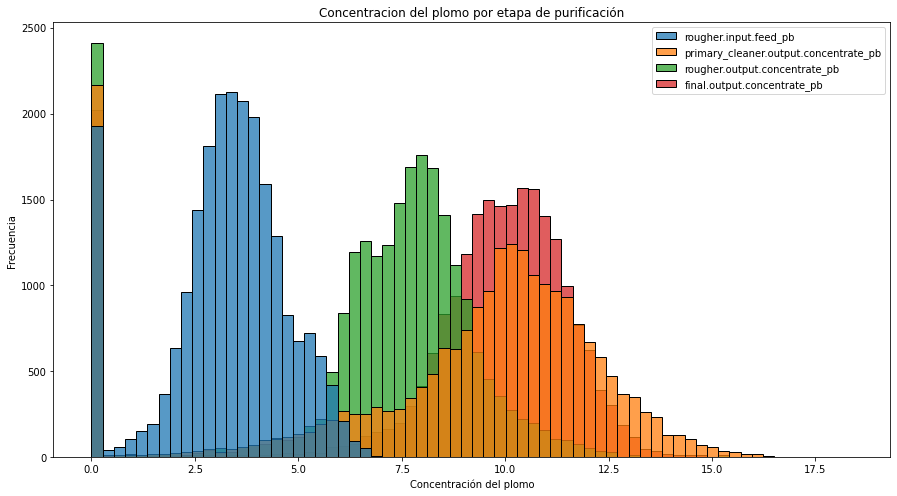

In [20]:
# Histrograma de concentracion de plomo por etapa 
au_concentrate = data_full[['rougher.input.feed_pb', 'primary_cleaner.output.concentrate_pb', 'rougher.output.concentrate_pb', 
                  'final.output.concentrate_pb']]

plt.figure(figsize = [15,8])
sns.histplot(au_concentrate)
plt.xlabel('Concentración del plomo')
plt.ylabel('Frecuencia')
plt.title('Concentracion del plomo por etapa de purificación')
plt.show()


Se observa que la concentracion de plomo disminuye desde que entra hasta su salida.

### Particulas de alimentación

In [21]:
#realizamos un describe para el size del data_train
data_train['primary_cleaner.input.feed_size'].describe()

count    16860.000000
mean         7.297285
std          0.619166
min          1.080000
25%          6.940000
50%          7.285000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

In [22]:
#realizamos un describe para el size del data_test
data_test['primary_cleaner.input.feed_size'].describe()

count    5856.000000
mean        7.264651
std         0.611526
min         5.650000
25%         6.885625
50%         7.259333
75%         7.650000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

(0.0, 15.0)

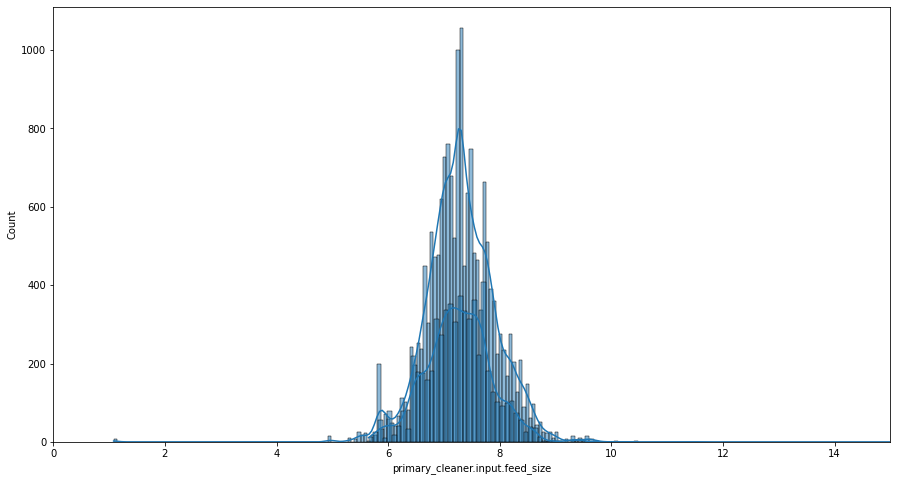

In [23]:
#Histograma de data_train y data_test en el primary_feed_size
r_size=data_train['primary_cleaner.input.feed_size']
t_tes=data_test['primary_cleaner.input.feed_size']
plt.figure(figsize = [15,8])
sns.histplot(r_size, kde=True)
sns.histplot(t_tes, kde=True)
plt.xlim([0,15])

Se observa que la media y desviación estandar en el data_train y data_test en la columna *primary_cleaner.input.feed_size* no varían significativamente.

In [24]:
#realizamos un describe para el rougher_size del data_train
data_train['rougher.input.feed_size'].describe()

count    16860.000000
mean        60.188595
std         30.522242
min          9.659576
25%         47.548897
50%         54.066003
75%         65.397249
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [25]:
#realizamos un describe para el rougher_size del data_test
data_test['rougher.input.feed_size'].describe()

count    5856.000000
mean       55.898866
std        22.707969
min         0.046369
25%        43.852884
50%        49.964796
75%        61.628003
max       477.445473
Name: rougher.input.feed_size, dtype: float64

(0.0, 200.0)

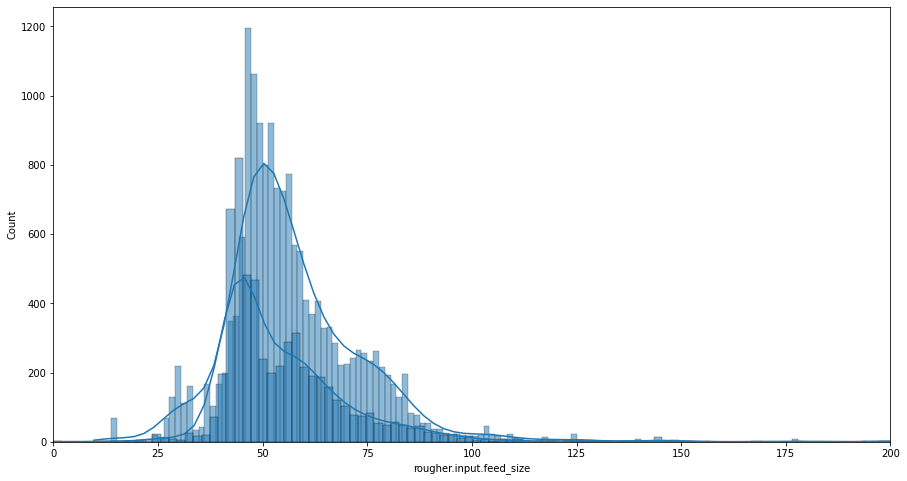

In [26]:
#Histograma de data_train y data_test en el rougher_size
r_size=data_train['rougher.input.feed_size']
t_tes=data_test['rougher.input.feed_size']
plt.figure(figsize = [15,8])
sns.histplot(r_size, kde=True)
sns.histplot(t_tes, kde=True)
plt.xlim([0,200])

Se observa que la media y desviación estandar en el data_train y data_test en la columna *rougher.input.feed_size* no varían significativamente. La linea de tendencia del histograma es diferente debido a la diferencia en la cantidad de datos entre de data_train y data_test.

### Concentraciones totales

In [27]:
#Sumamos por etapa para todos los metales
imput_roug = data_full[['rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1)
output_roug = data_full[['rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']].sum(axis=1)
primary_roug = data_full[['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']].sum(axis=1)
final_outp = data_full[['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol']].sum(axis=1)

<AxesSubplot:ylabel='Count'>

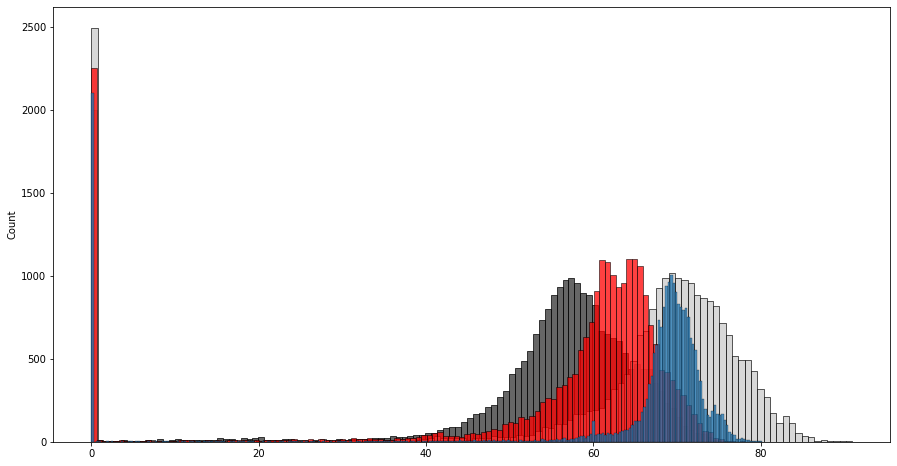

In [28]:
#histograma de concentraciones totales por etapa
plt.figure(figsize = [15,8])
sns.histplot(imput_roug, color = '0.2')
sns.histplot(output_roug, color = '0.8')
sns.histplot(primary_roug, color = 'red')
sns.histplot(final_outp)


In [29]:
#En data_full agregramos columnas con los valores obtenidos
data_full['imput_roug'] = imput_roug
data_full['output_roug'] = output_roug
data_full['primary_roug'] = primary_roug
data_full['final_outp'] = final_outp

Se observa en esta grafica y anteriores valores pegados a 0, estos se procedera a filtrar.

In [30]:
#Condicion mayor a 1 en las columnas
data_filtr = data_full.query('imput_roug>1 & output_roug>1 & primary_roug>1 & final_outp>1')

data_train = data_train[data_train['date'].isin(data_filtr['date'])].reset_index(drop=True)

data_test = data_test[data_test['date'].isin(data_filtr['date'])].reset_index(drop=True)

### Construir el modelo

In [31]:
# Features y target en el data_train
target = ['rougher.output.recovery', 'final.output.recovery']
target_train = data_train[target].reset_index(drop=True)
features_train = data_train.drop(target, axis = 1)
features_train = features_train.drop('date', axis = 1)

# Features y target en el data_test
target_test = data_test[target].reset_index(drop=True)
features_test = data_test.drop(target, axis = 1)
features_test = features_test.drop('date', axis = 1)

#### sMAPE

In [32]:
#Funcion smape 
def smape_fun(targt, prediction):
    n = len(targt)
    dif = abs(targt-prediction)
    mean = (abs(targt)+abs(prediction))/2
    smape = (1/n)*np.sum(dif/mean)*100
    return smape

#Funcion smpae ponderada
def smape_pond(targt, prediction):
    rougher_targt = targt.iloc[:,0]
    final_targt = targt.iloc[:,1]

    rougher_predic = prediction[:,0]
    final_predic = prediction[:,1]

    smape_roug = (smape_fun(rougher_targt, rougher_predic)*0.25) + (smape_fun(final_targt, final_predic)*0.75)
    return smape_roug

#### Modelo de Regresión Lineal

In [33]:
smape_score = make_scorer(smape_pond)
model = LinearRegression()
scores = cross_val_score(model, features_train, target_train, scoring=smape_score, cv = 5)

final_score = scores.mean()

print(scores)
print(final_score)

[12.70962167 10.14412671  9.99625789  8.42550036 12.45053436]
10.745208197269983


Se encuentra un smpae_score medio de 9.27

#### Modelo de Árbol de decisión

In [34]:
#arbol de profundidad 10
for depth in range(1, 11):    
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    scores = cross_val_score(model, features_train, target_train, scoring=smape_score, cv = 5)

    final_score = scores.mean()

    print('Depth: ',depth, 'smape_score: ', final_score)

Depth:  1 smape_score:  10.078331872501709
Depth:  2 smape_score:  10.052659901349221
Depth:  3 smape_score:  10.14685158744019
Depth:  4 smape_score:  10.230985997892635
Depth:  5 smape_score:  10.94049170641892
Depth:  6 smape_score:  10.870502400094429
Depth:  7 smape_score:  11.875987143029253
Depth:  8 smape_score:  12.296427096959524
Depth:  9 smape_score:  13.211888485117289
Depth:  10 smape_score:  13.859527194715247


El mejor smape_score medio se encuentra en el depth = 2 con un valor de 10.05

#### Modelo de Bosque aleatorio

In [35]:
#Profundidad de arbol 9
for est in range(1, 10):
    model = RandomForestRegressor(random_state=12345, n_estimators=10, max_depth=est)
    scores = cross_val_score(model, features_train, target_train, scoring=smape_score, cv = 5)

    final_score = scores.mean()

    print('Depth: ',est, 'smape_score: ', final_score)

Depth:  1 smape_score:  9.743234604931839
Depth:  2 smape_score:  9.484618974063299
Depth:  3 smape_score:  9.272604768624381
Depth:  4 smape_score:  9.295110741762153
Depth:  5 smape_score:  9.561248121697153
Depth:  6 smape_score:  9.41665924279554
Depth:  7 smape_score:  9.555187756547735
Depth:  8 smape_score:  9.806017843557443
Depth:  9 smape_score:  10.02304478978866


El mejor smape_score medio se encuentra en el depth = 3 con un valor de 9.27

### Modelo en el conjunto de prueba

In [36]:
model = RandomForestRegressor(random_state=12345, n_estimators=10, max_depth=3)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('sMAPE score: ', smape_pond(target_test, predictions))

sMAPE score:  7.734213263387515


### Conclusiones

1. Se procedio a rellenar los valores ausentes con los valores aledaños al tener las fechas cercanas de donde se extrajeron los datos.


2. La concentracion de oro y plata aumento en su paso por etapa desde ingreso limpieza y salida, de manera análoga en rougher, por otra parte la concentracion en plomo disminuye en su paso por las etapas.


3. Las distribuciones de las tamaños de las particulas de *data_train* y *data_test* para no varian significativamente, en el primero se obtuvo una media de 60.18 y una desviación estandar de 30.5, mientras que para el segundo conjunto de datos se obuvo media de 55.8 y desviación estandar de 22.7.


4. La metrica sMAPE fue evaluada para los diferentes modelos, para el modelo de regresion se obtuvo el valor de 10.74, para el Arbol de decisión es de 10.05 y para el Bosque aleatorio es de 9.27; siendo este útlimo el menor, se selecciono para entrenarlo y evaluar la metrica en el conjunto de prueba *data_test* resultando 7.73.
